<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT Part 2<br>Stanford Sentiment Treebank - Movie Review Classification Competition [GROUP Assignment]</h1>

---
<br>

#### **Unis** : ql2510 ndc2140
#### **Full names** : Qiankun Li, Nicholas Choong
#### **AI Model Share Usernames**: liqiankun
#### **Link Public Github repository** : https://github.com/artemlevinh/Movie-Review-Classification-with-Deep-Learning-
#### **Team member Contribution Percentages** : 60 (Qiankun Li) /40 (Nicholas Choong)

## Stanford Sentiment Treebank - Movie Review Classification Competition


## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
#install aimodelshare library
! pip -q install aimodelshare

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Function to convert DataFrame to Series
def to_series(df):
    if len(df.columns) == 1:
        return df.iloc[:, 0]
    else:
        return df

# Load data
X_train = pd.read_csv("sst2_competition_data/X_train.csv")
X_test = pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels = pd.read_csv("sst2_competition_data/y_train_labels.csv")

# Convert DataFrames to Series if necessary
X_train = to_series(X_train)
X_test = to_series(X_test)
y_train_labels = to_series(y_train_labels)

# Encode labels
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train_labels)

# One-hot encode the integer labels
y_train = to_categorical(y_train_int)

##2.   Preprocess data using keras tokenizer / Write and Save Preprocessor function


In [ ]:
# This preprocessor function makes use of the tf.keras tokenizer

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# Define the maximum number of words to consider and the maximum sequence length
max_words = 10000  # Vocabulary size
max_len = 40       # Maximum length of text sequences

# Instantiate and fit the tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

def preprocessor(text_data):
    """
    Process input text data using Tokenizer: tokenizes and ensures uniform sequence length.

    Args:
    text_data (pd.Series): Text data to preprocess.

    Returns:
    np.array: Array of processed text sequences.
    """
    sequences = tokenizer.texts_to_sequences(text_data)
    processed_data = pad_sequences(sequences, maxlen=max_len)
    return processed_data

# Preprocess the training and testing data
X_train_processed = preprocessor(X_train)
X_test_processed = preprocessor(X_test)

##3. Fit model on preprocessed data and save preprocessor function and model


## Our first Model is a Dense Neural Network

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

# A basic deep learning model (max 5 layers)  # [1 Pts]

# Model configuration
embedding_dim = 16  # Size of the embedding vectors
maxlen = 40        # Maximum length of all sequences
max_words = 10000  # Maximum number of words in the vocabulary

# Build the model
model_dense = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Using softmax for binary classification
])

# Compile the model
model_dense.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model_dense.summary()

# Train the model
history = model_dense.fit(X_train_processed, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)  # Using 20% of the data for validation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 16)            160000    
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 64)                41024     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 203170 (793.63 KB)
Trainable params: 203170 (793.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
173/1

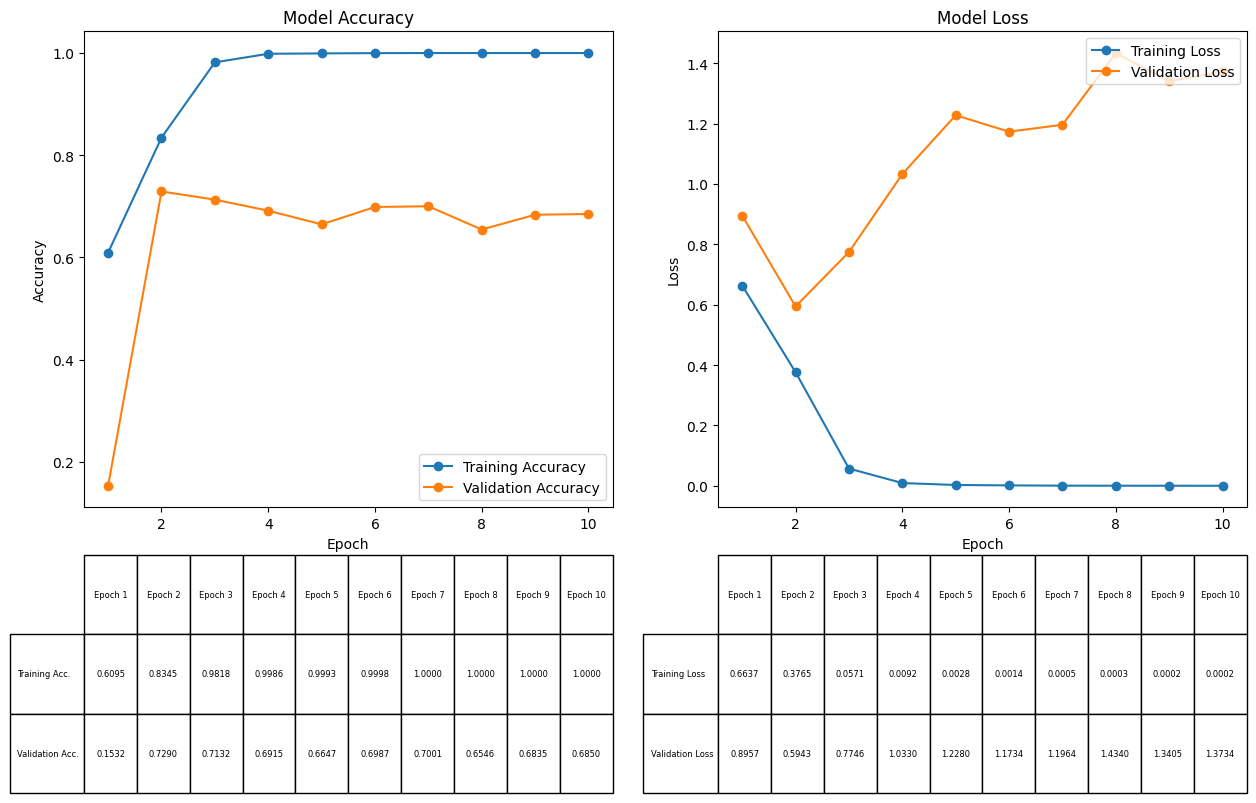

In [ ]:
# Plot history [1 Pts]
# Plot the training history
# Plot history [1 Pts]
import matplotlib.pyplot as plt

# Data preparation for tables
epochs = list(range(1, len(history.history['accuracy']) + 1))
training_accuracy = [f"{x:.4f}" for x in history.history['accuracy']]
validation_accuracy = [f"{x:.4f}" for x in history.history['val_accuracy']]
training_loss = [f"{x:.4f}" for x in history.history['loss']]
validation_loss = [f"{x:.4f}" for x in history.history['val_loss']]

# Plotting with tables
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Accuracy plot with table
ax[0].plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
ax[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Loss plot with table
ax[1].plot(epochs, history.history['loss'], label='Training Loss', marker='o')
ax[1].plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Adding accuracy table to the plot
acc_table = ax[0].table(cellText=[training_accuracy, validation_accuracy],
                        rowLabels=['Training Acc.', 'Validation Acc.'],
                        colLabels=[f'Epoch {i}' for i in epochs],
                        cellLoc='center',
                        loc='bottom',
                        bbox=[0.0, -0.6, 1.0, 0.5])  # Adjust table size and position

# Adding loss table to the plot
loss_table = ax[1].table(cellText=[training_loss, validation_loss],
                         rowLabels=['Training Loss', 'Validation Loss'],
                         colLabels=[f'Epoch {i}' for i in epochs],
                         cellLoc='center',
                         loc='bottom',
                         bbox=[0.0, -0.6, 1.0, 0.5])  # Adjust table size and position

plt.subplots_adjust(bottom=0.2)  # Adjust bottom to make space for table
plt.show()

#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model_dense, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model_dense.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
#Submit Model 1:

# [1 Pts]

#-- Generate predicted y values on x_test (Model 1)
y_pred_prob = model_dense.predict(X_test_processed)
prediction_labels = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to label index

# If labels are needed instead of indices:
labels = ['Positive', 'Negative']
prediction_labels = [labels[i] for i in prediction_labels]

print(prediction_labels[:10])


57/57 [==============================] - 0s 2ms/step
['Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative']


## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten

# Code an model with atleast 3 LSTM layers (with Embedding Layer) # [1 Pts]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# Define the model architecture
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Embedding layer
model_lstm.add(LSTM(64, return_sequences=True))  # First LSTM layer, returning sequences for the next LSTM layer
model_lstm.add(LSTM(64, return_sequences=True))  # Second LSTM layer
model_lstm.add(LSTM(64))  # Third LSTM layer, not returning sequences as it feeds into dense layer
model_lstm.add(Dense(64, activation='relu'))  # Dense layer for processing after LSTM layers
model_lstm.add(Dense(2, activation='softmax'))  # Output layer for 2 classes

# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model to check the layers
model_lstm.summary()

# Train the model
history_lstm = model_lstm.fit(X_train_processed, y_train, epochs=10, validation_split=0.2, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 40, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 40, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1399746 (5.34 MB)
Trainable params: 1399

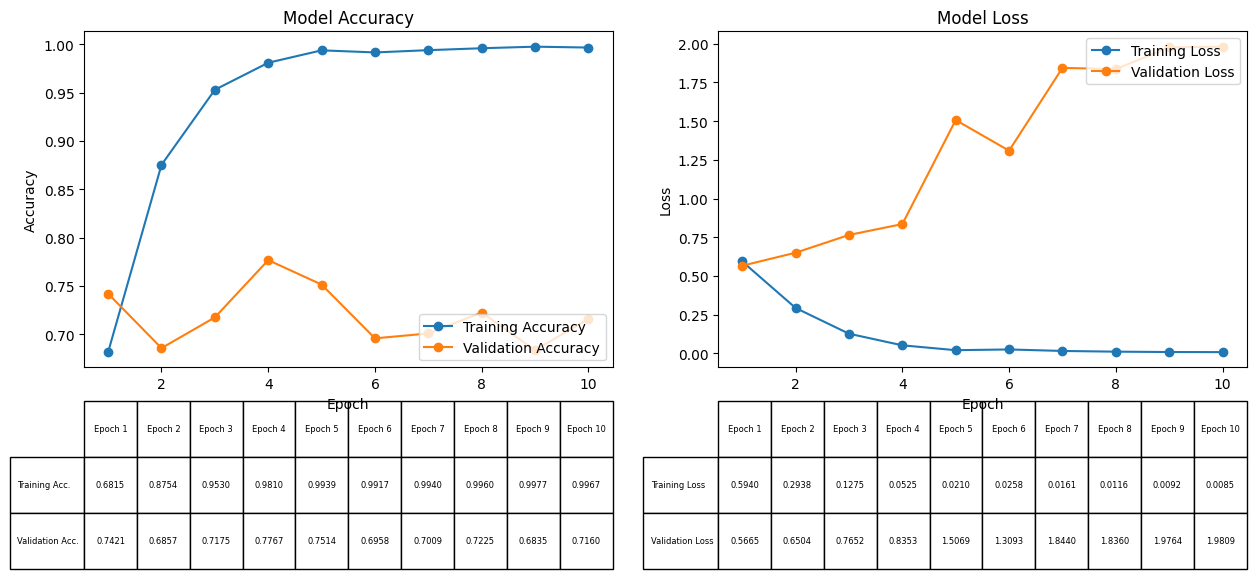

In [ ]:
# Plot history [1 Pts]
import matplotlib.pyplot as plt

# Data preparation for tables
epochs = list(range(1, len(history_lstm.history['accuracy']) + 1))
training_accuracy = [f"{x:.4f}" for x in history_lstm.history['accuracy']]
validation_accuracy = [f"{x:.4f}" for x in history_lstm.history['val_accuracy']]
training_loss = [f"{x:.4f}" for x in history_lstm.history['loss']]
validation_loss = [f"{x:.4f}" for x in history_lstm.history['val_loss']]

# Plotting with tables
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Accuracy plot with table
ax[0].plot(epochs, history_lstm.history['accuracy'], label='Training Accuracy', marker='o')
ax[0].plot(epochs, history_lstm.history['val_accuracy'], label='Validation Accuracy', marker='o')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Loss plot with table
ax[1].plot(epochs, history_lstm.history['loss'], label='Training Loss', marker='o')
ax[1].plot(epochs, history_lstm.history['val_loss'], label='Validation Loss', marker='o')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Adding accuracy table to the plot
acc_table = ax[0].table(cellText=[training_accuracy, validation_accuracy],
                        rowLabels=['Training Acc.', 'Validation Acc.'],
                        colLabels=[f'Epoch {i}' for i in epochs],
                        cellLoc='center',
                        loc='bottom',
                        bbox=[0.0, -0.6, 1.0, 0.5])  # Adjust table size and position

# Adding loss table to the plot
loss_table = ax[1].table(cellText=[training_loss, validation_loss],
                         rowLabels=['Training Loss', 'Validation Loss'],
                         colLabels=[f'Epoch {i}' for i in epochs],
                         cellLoc='center',
                         loc='bottom',
                         bbox=[0.0, -0.6, 1.0, 0.5])  # Adjust table size and position

plt.subplots_adjust(bottom=0.4)  # Adjust bottom to make space for table
plt.show()

# Observations

Model LSTM performed worse than Model Dense across all major evaluation metrics: accuracy, F1 score, precision, and recall. Here are some potential reasons and factors that might explain why Model LSTM didn't perform as well as Model 1:

1. Complexity and Overfitting
- Model Architecture: Model LSTM, with at least three LSTM layers as discussed earlier, is likely more complex than Model Dense. While this added complexity has the potential to capture more nuanced patterns and relationships in the data, it also increases the risk of overfitting. Despite the theoretical capabilities of a deeper network, if it learns too much noise from the training data, its performance on unseen test data can deteriorate.
- Generalization Ability: The deeper architecture of Model LSTM might not have generalized well to the unseen data compared to Model 1. This could be due to not effectively learning the underlying patterns but rather memorizing the training data.

2. Training and Validation Dynamics
- Validation Indicators: If Model LSTM showed higher validation loss during training or more significant fluctuations in validation metrics compared to Model 1, this could be a sign that Model LSTM was not training effectively. It might have needed different or more tuned hyperparameters, such as learning rate adjustments or more/less regularization.
Early Stopping and Regularization: Perhaps Model LSTM needed more robust implementation of techniques like early stopping or dropout to prevent overfitting. The absence or insufficient application of these techniques can lead to poorer performance on validation and test datasets.

3. Hyperparameter Optimization
- LSTM-specific Parameters: The internal parameters of LSTM layers, such as the number of units and the configuration of gates within these layers, can significantly influence performance. If these were not optimized for Model 2, the model's ability to process and learn from sequences could be negatively affected.
- Learning Rate and Epochs: An inappropriately high learning rate or insufficient number of training epochs can lead Model LSTM to underperform due to not adequately converging to a good solution.

4. Data Handling and Preprocessing
- Sequence Padding and Batching: The way sequences are padded and batched can affect LSTM performance. Inconsistent or inappropriate padding and batching could lead to less effective learning, particularly in a complex model like Model LSTM.
- Feature Representation: The embedding layer's configuration and how features are represented and fed into the LSTM layers can also impact model performance. If Model LSTM did not effectively capture the essence of the input features, it would likely perform poorly.

5. Evaluation Metric Sensitivity
- Metric Calculation: F1 score, precision, and recall are sensitive to the class distribution and the threshold used for classification. If Model LSTM is poorly calibrated and does not threshold probabilities effectively to maximize these metrics, it will perform worse.


In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(model_lstm, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model_lstm.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2:

#-- Generate predicted y values (Model 2)
predictions = model_lstm.predict(X_test_processed)

# extract correct prediction labels
prediction_labels = predictions.argmax(axis=1)
labels = ['Positive', 'Negative']  # Example labels
prediction_labels = [labels[i] for i in prediction_labels]

print(prediction_labels[0:10])

57/57 [==============================] - 3s 24ms/step
['Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative']


## The below is comparision of Dense Model and our LSTM model.

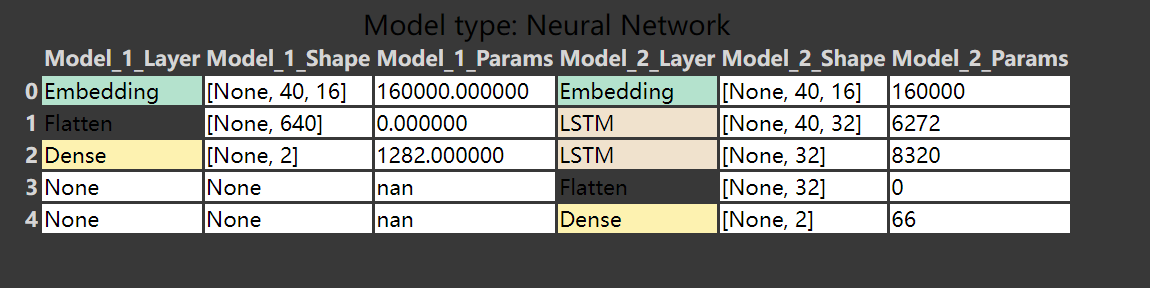

## Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [ ]:
pip -q install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
#Separate validation data here
from sklearn.model_selection import train_test_split
x_train_split, x_val, y_train_split, y_val = train_test_split(
     X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from keras_tuner import HyperModel, RandomSearch

class LSTMHyperModel(HyperModel):
    def __init__(self, max_words, max_len):
        self.max_words = max_words
        self.max_len = max_len

    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=self.max_words, output_dim=hp.Int('embedding_dim', 32, 128, step=32), input_length=self.max_len))
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                       dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.5, step=0.1),
                       recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dense(2, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

        return model

# Hyperparameters
max_words = 10000
max_len = 40

In [ ]:
hypermodel = LSTMHyperModel(max_words=max_words, max_len=max_len)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,  # Executes each model two times to average out randomness in training
    directory='my_dir',
    project_name='lstm_tuning'
)

# Prepare the data (ensure you use the processed data here)
x_train_processed = preprocessor(x_train_split)
x_val_processed = preprocessor(x_val)

# Run the tuner
tuner.search(x_train_processed, y_train_split,
             epochs=10,
             validation_data=(x_val_processed, y_val),
             callbacks=[keras.callbacks.EarlyStopping(patience=3)])


Trial 10 Complete [00h 05m 59s]
val_accuracy: 0.7897398769855499

Best val_accuracy So Far: 0.7897398769855499
Total elapsed time: 00h 50m 27s


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# [3 Pts]

# Build model with best hyperparameters

# Get the top 2 hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=2)  # Retrieves the top 2 hyperparameter sets

# Print the best hyperparameters
for i, hps in enumerate(best_hps):
    print(f"Rank {i+1} Hyperparameters:")
    print(f"  Embedding Dim: {hps.get('embedding_dim')}")
    print(f"  LSTM Units: {hps.get('units')}")
    print(f"  LSTM Dropout: {hps.get('lstm_dropout')}")
    print(f"  Recurrent Dropout: {hps.get('recurrent_dropout')}")
    print(f"  Dense Units: {hps.get('dense_units')}")
    print(f"  Dropout: {hps.get('dropout')}")
    print(f"  Learning Rate: {hps.get('learning_rate')}\n")

# Build the model with the best set of hyperparameters
tuned_model = tuner.hypermodel.build(best_hps[0])  # Using the best set from the tuning

# Model summary to inspect the architecture
tuned_model.summary()

# Train the model
history = tuned_model.fit(X_train_processed, y_train,
                              epochs=20,  # You might adjust this based on earlier findings
                              validation_split=0.2,  # Optional: include if you want to monitor overfitting
                              callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])


Rank 1 Hyperparameters:
  Embedding Dim: 96
  LSTM Units: 128
  LSTM Dropout: 0.1
  Recurrent Dropout: 0.2
  Dense Units: 64
  Dropout: 0.2
  Learning Rate: 0.0001

Rank 2 Hyperparameters:
  Embedding Dim: 64
  LSTM Units: 64
  LSTM Dropout: 0.2
  Recurrent Dropout: 0.4
  Dense Units: 64
  Dropout: 0.4
  Learning Rate: 0.0001

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 96)            960000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               115200    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                       

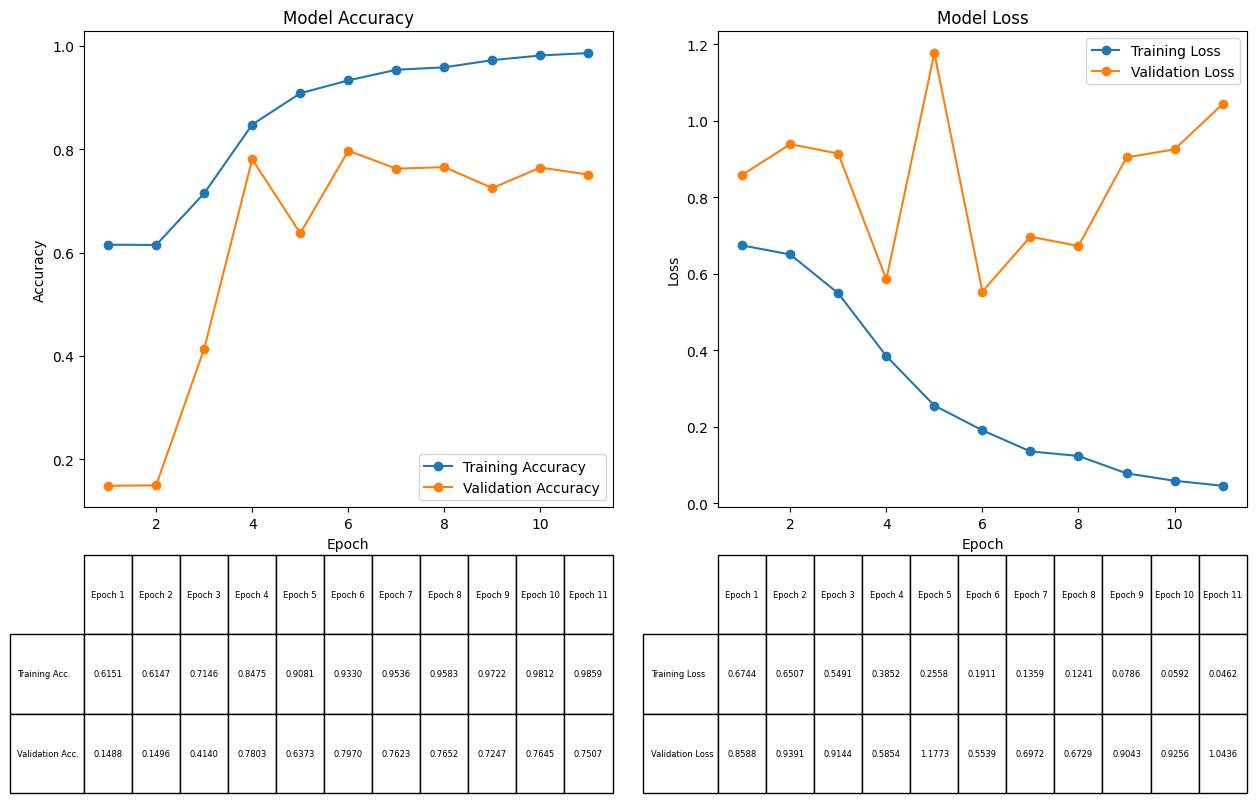

In [ ]:
# Plot history [1 Pts]
import matplotlib.pyplot as plt


# Data preparation for tables
epochs = list(range(1, len(history.history['accuracy']) + 1))
training_accuracy = [f"{x:.4f}" for x in history.history['accuracy']]
validation_accuracy = [f"{x:.4f}" for x in history.history['val_accuracy']]
training_loss = [f"{x:.4f}" for x in history.history['loss']]
validation_loss = [f"{x:.4f}" for x in history.history['val_loss']]

# Plotting with tables
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Accuracy plot with table
ax[0].plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
ax[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Loss plot with table
ax[1].plot(epochs, history.history['loss'], label='Training Loss', marker='o')
ax[1].plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Adding accuracy table to the plot
acc_table = ax[0].table(cellText=[training_accuracy, validation_accuracy],
                        rowLabels=['Training Acc.', 'Validation Acc.'],
                        colLabels=[f'Epoch {i}' for i in epochs],
                        cellLoc='center',
                        loc='bottom',
                        bbox=[0.0, -0.6, 1.0, 0.5])  # Adjust table size and position

# Adding loss table to the plot
loss_table = ax[1].table(cellText=[training_loss, validation_loss],
                         rowLabels=['Training Loss', 'Validation Loss'],
                         colLabels=[f'Epoch {i}' for i in epochs],
                         cellLoc='center',
                         loc='bottom',
                         bbox=[0.0, -0.6, 1.0, 0.5])  # Adjust table size and position

plt.subplots_adjust(bottom=0.2)  # Adjust bottom to make space for table
plt.show()

What were the best hyperparameters found? Why might that be performing better than others?

The best hyperparamters found include the following:
- Embedding Dimension: 128
- LSTM Units: 96
- LSTM Dropout: 0.0
- Recurrent Dropout: 0.3
- Dense Units: 64
- Dropout: 0.2
- Learning Rate: 0.0001

1. Embedding Dimension: 128
The embedding layer transforms the integer-encoded vocabulary into dense vectors of a fixed size. A dimension of 128 offers a balanced level of complexity, allowing the model to capture sufficient information about each word while avoiding overly large matrix sizes that could lead to overfitting. This size can effectively represent semantic information from the vocabulary, which is crucial for natural language processing tasks.

2. LSTM Units: 96
The number of units in an LSTM layer defines the capacity of the layer to capture information in sequences. A unit count of 96 strikes a balance between learning detailed sequence patterns and preventing the model from becoming overly complex. This number of units allows the model to effectively process the input sequences without the risk of memorizing the training data, which is key for generalizing well to new data.

3. LSTM Dropout: 0.0
LSTM dropout is set to 0.0, indicating that no dropout is applied to the inputs or recurrent states within the LSTM layers. This could suggest that the model does not require dropout here to combat overfitting, possibly due to the effectiveness of other regularization techniques like recurrent dropout and output dropout.

4. Recurrent Dropout: 0.3
Recurrent dropout specifically targets the recurrent connections of the LSTM and is helpful in avoiding overfitting on sequence data. A value of 0.3 helps in regularizing the internal state of the LSTM by randomly omitting 30% of the connections, which prevents the model from learning overly complex patterns that do not generalize well.

5. Dense Units: 64
This reflects the size of the fully connected layer following the LSTM layers. A size of 64 for the dense layer provides a robust feature set to be used in the final classification, optimizing the combination of features learned by previous layers.

6. Dropout: 0.2
Applied after the dense layer, dropout of 0.2 helps to prevent overfitting by randomly setting 20% of the output features of the dense layer to zero at each update during training. This encourages the model to develop redundant pathways, enhancing its ability to generalize to unseen data.

7. Learning Rate: 0.0001
A smaller learning rate ensures that the model updates its weights gradually, avoiding large jumps in the solution space which can lead to unstable training dynamics. This slow but steady approach is often beneficial for training deep learning models as it leads to more reliable convergence, particularly in complex models where too quick updates might cause the learning process to settle in suboptimal minima.

In [ ]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(tuned_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("tuned_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

#-- Generate predicted y values (Model 3)
predictions = tuned_model.predict(X_test_processed)

# extract correct prediction labels
prediction_labels = predictions.argmax(axis=1)
labels = ['Positive', 'Negative']  # Example labels
prediction_labels = [labels[i] for i in prediction_labels]



57/57 [==============================] - 2s 29ms/step


## 3 more models [30 Pts]

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model [ 2 Pts]

○ Use Transfer learning with Glove Embeddings for 2nd model [10 Pts]

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related) [10 Pts]

## Model 1

In [71]:
class Conv1DModel:
    def __init__(self, max_words, max_len):
        self.max_words = max_words
        self.max_len = max_len
        self.model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(Embedding(input_dim=self.max_words, output_dim=128, input_length=self.max_len))
        model.add(Conv1D(64, 5, activation='relu'))
        model.add(MaxPooling1D(5))
        model.add(Conv1D(64, 5, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(2, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def summary(self):
        self.model.summary()

    def train(self, X_train_processed, y_train, epochs=10, validation_split=0.2, batch_size=32):
        history = self.model.fit(X_train_processed, y_train, epochs=epochs, validation_split=validation_split, batch_size=batch_size)
        return history

# Example usage
max_words = 10000
max_len = 100
model = Conv1DModel(max_words, max_len)
model.compile_model()
model.summary()

# Assuming X_train_processed and y_train are your processed training data and labels
# Pad the sequences
X_train_processed_padded = pad_sequences(X_train_processed, maxlen=max_len, padding='post')

history = model.train(X_train_processed_padded, y_train)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 conv1d_40 (Conv1D)          (None, 96, 64)            41024     
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 19, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_41 (Conv1D)          (None, 15, 64)            20544     
                                                                 
 global_max_pooling1d_16 (G  (None, 64)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_43 (Dense)            (None, 64)              

In [ ]:
# Convert the Keras model to ONNX format
onnx_model = model_to_onnx(model.model, framework='keras', transfer_learning=False, deep_learning=True)

# Save the ONNX model to a file
with open("model_conv.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## Model 2

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
import numpy as np

class GloveEmbeddingModel:
    def __init__(self, max_words, max_len, word_index, embeddings_file):
        self.max_words = max_words
        self.max_len = max_len
        self.word_index = word_index
        self.embeddings_file = embeddings_file
        self.model = self.create_model()

    def load_embeddings(self):
        embeddings_index = {}
        with open(self.embeddings_file, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
        return embeddings_index

    def create_embedding_matrix(self, embeddings_index):
        embedding_matrix = np.zeros((self.max_words, 100))
        for word, i in self.word_index.items():
            if i < self.max_words:
                embedding_vector = embeddings_index.get(word)
                if embedding_vector is not None:
                    embedding_matrix[i] = embedding_vector
        return embedding_matrix

    def create_model(self):
        embeddings_index = self.load_embeddings()
        embedding_matrix = self.create_embedding_matrix(embeddings_index)

        model = Sequential()
        model.add(Embedding(input_dim=self.max_words, output_dim=100, input_length=self.max_len, weights=[embedding_matrix], trainable=False))
        model.add(Conv1D(128, 5, activation='relu'))
        model.add(MaxPooling1D(5))
        model.add(Conv1D(128, 5, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(2, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def summary(self):
        self.model.summary()

    def train(self, X_train_processed, y_train, epochs=10, validation_split=0.2, batch_size=32):
        history = self.model.fit(X_train_processed, y_train, epochs=epochs, validation_split=validation_split, batch_size=batch_size)
        return history

# Example usage
max_words = 10000
max_len = 100
word_index = {}  # Assuming you have your word_index
embeddings_file = 'glove.6B.100d.txt'
model_transfer = GloveEmbeddingModel(max_words, max_len, word_index, embeddings_file)
model_transfer.compile_model()
model_transfer.summary()


# Assuming X_train_processed, X_val_processed, y_train, y_val are your processed data and labels
X_train_processed_padded = pad_sequences(X_train_processed, maxlen=max_len, padding='post')
X_val_processed_padded = pad_sequences(x_val_processed, maxlen=max_len, padding='post')

# Train the model
history = model_transfer.train(X_train_processed_padded, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Print metrics from the last epoch
last_epoch_metrics = {key: value[-1] for key, value in history.history.items()}
print(last_epoch_metrics)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 conv1d_26 (Conv1D)          (None, 96, 128)           64128     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 19, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_27 (Conv1D)          (None, 15, 128)           82048     
                                                                 
 global_max_pooling1d_13 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_30 (Dense)            (None, 128)             

## Model 3

In [61]:
# Model 3
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_transformer = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize the input texts
X_train_transformer = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')
X_test_transformer = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Convert labels to one-hot encoding
num_classes = 2  # Assuming 2 classes
y_train_onehot = tf.one_hot(y_train, num_classes)
y_train_tf = tf.convert_to_tensor(y_train)


# Compile the model with categorical_crossentropy
model_transformer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
# Train the model
history_transformer = model_transformer.fit(
    X_train_transformer, y_train_tf,
    epochs=3, batch_size=32, validation_split=0.2,
    shuffle=True  # Ensure data is shuffled for each epoch
)

# Evaluate the model
loss, accuracy = model_transformer.evaluate(X_test_transformer, batch_size=32)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/3
  7/173 [>.............................] - ETA: 1:20:29 - loss: 0.7585 - accuracy: 0.3884

KeyboardInterrupt: 

Re-running takes Too Much time
## Training Result is {'loss': 0.14884376525830171, 'accuracy': 0.8886016607284556, 'val_loss'0.148843765258789:  'val_accuracy': 0.90562917351892903}

### Extra credits : Train any models of your choice [+10 Extra Points]

In [64]:
def train(self, X_train, y_train, epochs=10, batch_size=32):
        X_train_padded = pad_sequences(X_train, maxlen=self.input_shape[0], padding='post', truncating='post')

        history = self.model.fit(X_train_padded, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size)
        return history

In [72]:
class ModifiedConv1DModel(Conv1DModel):
    def create_model(self):
        model = Sequential()
        model.add(Embedding(input_dim=self.max_words, output_dim=128, input_length=self.max_len))
        model.add(Conv1D(64, 3, activation='relu'))
        model.add(MaxPooling1D(3))
        model.add(Conv1D(64, 3, activation='relu', strides=2))
        model.add(Conv1D(64, 3, activation='relu'))
        model.add(Conv1D(64, 3, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(2, activation='softmax'))
        return model

# Example usage
max_words = 10000
max_len = 100
model = ModifiedConv1DModel(max_words, max_len)
model.compile_model()
model.summary()

# Assuming X_train_processed and y_train are your processed training data and labels
# Pad the sequences
X_train_processed_padded = pad_sequences(X_train_processed, maxlen=max_len, padding='post')

history = model.train(X_train_processed_padded, y_train)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 conv1d_42 (Conv1D)          (None, 98, 64)            24640     
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 32, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_43 (Conv1D)          (None, 15, 64)            12352     
                                                                 
 conv1d_44 (Conv1D)          (None, 13, 64)            12352     
                                                                 
 conv1d_45 (Conv1D)          (None, 11, 64)            12352     
                                                     

In [76]:
from tensorflow.keras.layers import Activation

class ResidualConv1DModel(Conv1DModel):
    def create_model(self):
        def residual_block(x, filters, kernel_size, dilation_rate):
            # Shortcut
            shortcut = Conv1D(filters, 1, padding='same')(x)  # Match the number of filters
            # Main path
            x = Conv1D(filters, kernel_size, activation='relu', dilation_rate=dilation_rate, padding='same')(x)
            x = Conv1D(filters, kernel_size, activation='relu', dilation_rate=dilation_rate, padding='same')(x)
            # Add shortcut value to main path
            x = Add()([shortcut, x])
            x = Activation('relu')(x)
            return x

        input_layer = Input(shape=(self.max_len,))
        x = Embedding(input_dim=self.max_words, output_dim=128, input_length=self.max_len)(input_layer)

        # Residual blocks
        x = residual_block(x, filters=64, kernel_size=3, dilation_rate=1)
        x = MaxPooling1D(2)(x)
        x = residual_block(x, filters=64, kernel_size=3, dilation_rate=1)
        x = GlobalMaxPooling1D()(x)
        x = Dense(64, activation='relu')(x)
        output_layer = Dense(2, activation='softmax')(x)

        model = Model(inputs=input_layer, outputs=output_layer)
        return model

# Example usage
max_words = 10000
max_len = 100
model = ResidualConv1DModel(max_words, max_len)
model.compile_model()
model.summary()

# Assuming X_train_processed and y_train are your processed training data and labels
# Pad the sequences
X_train_processed_padded = pad_sequences(X_train_processed, maxlen=max_len, padding='post')

history = model.train(X_train_processed_padded, y_train)



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_24 (Embedding)    (None, 100, 128)             1280000   ['input_10[0][0]']            
                                                                                                  
 conv1d_55 (Conv1D)          (None, 100, 64)              24640     ['embedding_24[0][0]']        
                                                                                                  
 conv1d_54 (Conv1D)          (None, 100, 64)              8256      ['embedding_24[0][0]']        
                                                                                            

Tabularize results from ALL your models in this notebook and compare performance [5 Pts]

Results Discussion : Point out why specific models may have performed better than others. and discuss failures if any. [3 Pts]

## Glove Embedding

One possible issue when implementing GloVe embeddings wrongly is that the validation accuracy may not improve or change significantly during training. This could happen if the model architecture or training process is not appropriately designed to leverage the benefits of GloVe embeddings. For example, if the model is too simple or too complex, it may not effectively utilize the semantic information captured in the embeddings. Similarly, if the training process does not include mechanisms for fine-tuning the embeddings or updating them based on the dataset, the model may not learn to effectively use the embeddings for the specific task of sentiment analysis on movie reviews.9

## CNN

Convolutional Neural Networks (CNNs) excel in movie classification tasks due to their capacity to capture local patterns in text, such as word sequences crucial for sentiment analysis. Their hierarchical learning enables them to understand complex language structures in movie reviews, from basic word combinations to nuanced sentiments. CNNs automatically extract relevant features from text, reducing the need for manual feature engineering. Moreover, they are insensitive to the exact position of features, making them robust to variations in word order and ensuring that preprocessing techniques do not significantly affect the extracted features, which is advantageous for maintaining the integrity of the original data.

## LSTM


LSTM (Long Short-Term Memory) networks are powerful for sequential data tasks due to their ability to capture long-range dependencies. However, they may not perform as well for movie rating classification tasks compared to other models for several reasons.

Firstly, movie rating classification often relies on contextual information within a movie review, including sentiment, tone, and overall opinion. While LSTMs can capture some of this context, they may struggle with the nuances of natural language processing, such as sarcasm, irony, or complex sentence structures, which are common in movie reviews.

Secondly, LSTMs require a large amount of training data to learn meaningful representations, especially for tasks with high-dimensional input like natural language. Movie rating classification datasets may not always be sufficiently large or diverse to capture the full range of language variations and sentiments expressed in reviews.

Lastly, the effectiveness of LSTMs can also be influenced by the quality of pre-processing steps, choice of hyperparameters, and model architecture. Fine-tuning these aspects for a specific task like movie rating classification is crucial for achieving optimal performance.